<center><h1>Touch Note App Review Analysis</h1></center>

<B>Name -</B> Rahul Gaikwad

<B>Date -</B> March 1, 2021

<B>Position -</B> Machine Learning Engineer

<B>Interview Round -</B> 2 - Machine Learning Task

<B>Email Id -</B> rahul.gaikwad2010@gmail.com

<B>Mobile No. -</B> +91 9326117192

<hr/>

### Introduction

Sentiment analysis on reviews of android apps on Google Play-Store.

Suppose you want user reviews to be classified as positive and negative. Sentiment Analysis is a popular job to be performed by data scientists. This is a simple guide using Scikit-learn Classifier to create a Google Play store reviews classifier (Sentiment Analysis) in Python.

<hr/>

### Problem Statement

I have built a solution to classify <b>Touch Note App</b> reviews, the proposed solution is a combination of ML models performing classification task and giving max voted prediction as an output.

Combined approach guaranteed the accuracy around <b>85%</b>.

<hr/>

### Import necessary libraries

In [1]:
# Data representation and computation
import pandas as pd  
import numpy as np  

# Graph plotting
import matplotlib.pyplot as plt  
import seaborn as seabornInstance

# Data splitting, feature engg., and pipeline to train machine learning models
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

# Machine learning models
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Miscellaneous
import pickle
import re
import pylab as py 
import warnings
import calendar
import string
import json as js
import wordninja as wn

# import dill
import logging

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import punkt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

SENT_DETECTOR = nltk.data.load('tokenizers/punkt/english.pickle')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^09a-z #+_]')
lemmatizer = WordNetLemmatizer()

# Declaration
warnings.filterwarnings('ignore')
%precision 2
%matplotlib inline
seabornInstance.set(font_scale=1)

### Load Data

In [2]:
ldf_training_dataset = pd.read_csv("data/google_play_store_apps_reviews_training.csv", encoding='latin', index_col=False)

In [3]:
ldf_training_dataset = ldf_training_dataset[["polarity","review"]]
print("Total data points: "+str(len(ldf_training_dataset.polarity)))

Total data points: 891


In [4]:
ldf_training_dataset.head()

,polarity,review
0,negative,privacy at least put some option appear offli...
1,negative,"messenger issues ever since the last update, ..."
2,negative,profile any time my wife or anybody has more ...
3,negative,the new features suck for those of us who don...
4,negative,forced reload on uploading pic on replying co...


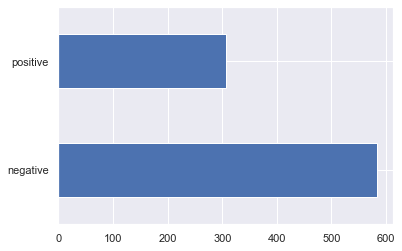

In [5]:
ldf_training_dataset['polarity'].value_counts().plot(kind="barh")

### Data Preprocessing

In [6]:
class text_pre_processing:
    def __init__(self):
        self.punct = string.punctuation
        self.stpwrds = set(stopwords.words('english'))
        self.lem = WordNetLemmatizer()
        self.snowballstem = SnowballStemmer('english')
        self.contractions = js.load(open("data/Contraction.json",'r')) 

    def data_cleaning(self, text):
        try:
            text = " ".join(wn.split(text))
            for word in text.split():
                if word.lower() in self.contractions:
                    text = text.replace(word, self.contractions[word.lower()])
            tokens = word_tokenize(text)          
            tokens = [token for token in tokens if token not in self.stpwrds]
            Repair_tokens=[]
            lemmatize_token =[]
            for x in tokens:
                index = [x.find(char) for char in x if char not in self.punct]
                Repair_tokens.append("".join([x[i] for i in index ]))
            Repair_tokens
            Repair_tokens = [x for x in Repair_tokens if not x.isdigit()]
            Repair_tokens = [self.lem.lemmatize(t,pos = 'v') for t in Repair_tokens ]
            Repair_tokens = [self.snowballstem.stem(t) for t in Repair_tokens]
            text =  " ".join(Repair_tokens)
            return text
        except:
            print(text)
    
obj = text_pre_processing()

In [7]:
ldf_training_dataset["CLEANED_REVIEW"] = ldf_training_dataset.review.map(obj.data_cleaning)

### Train Test & Validation Split

In [8]:
X = ldf_training_dataset.CLEANED_REVIEW
y = ldf_training_dataset.polarity

my_tags = y

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42, shuffle=True) 

### Frequency of selected classes 

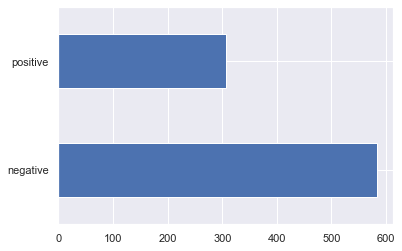

In [10]:
y.value_counts().plot(kind="barh")

### Model selection and training

##### 1. Define a model

In [11]:
l_svm_uni = Pipeline([
    ('vect',CountVectorizer(analyzer='word', ngram_range=(1, 1))),
    ('tfidf',TfidfTransformer()),
    ('clf',SGDClassifier(
        loss='hinge',
        penalty='l2',
        alpha=1e-3,
        random_state=42,
        max_iter=5,
        tol=None
    ))
])

log_reg_uni = Pipeline([
    ('vect',CountVectorizer(analyzer='word', ngram_range=(1, 1))),
    ('tfidf',TfidfTransformer()),
    ('clf',LogisticRegression(
        n_jobs=1,
        C=1e5
    ))
])

nb_uni = Pipeline([
    ('vect',CountVectorizer(analyzer='word', ngram_range=(1, 1))),
    ('tfidf',TfidfTransformer()),
    ('clf',MultinomialNB())
])

##### 2. Fit a model

In [12]:
lsvm_uni_model = l_svm_uni.fit(X_train, y_train)
log_reg_uni_model = log_reg_uni.fit(X_train, y_train)
nb_uni_model = nb_uni.fit(X_train, y_train)

##### 3. Make predictions

In [13]:
lsvm_uni_y_pred = lsvm_uni_model.predict(X_test)
log_reg_uni_y_pred = log_reg_uni_model.predict(X_test)
nb_uni_y_pred = nb_uni_model.predict(X_test)

lsvm_uni_y_val_pred = lsvm_uni_model.predict(x_val)
log_reg_uni_y_val_pred = log_reg_uni_model.predict(x_val)
nb_uni_y_val_pred = nb_uni_model.predict(x_val)

##### 4. Save to local storage

In [14]:
pickle.dump(lsvm_uni_model, open("models/svm.sav", 'wb'))
pickle.dump(log_reg_uni_model, open("models/log_reg.sav", 'wb'))
pickle.dump(nb_uni_model, open("models/naive_bayes.sav", 'wb'))

##### 5. Training Accuracy

In [15]:
print("- SVM")
print('Accuracy', str(metrics.accuracy_score(lsvm_uni_y_pred,y_test)))

print("\n- LOGISTIC REGRESSION")
print('Accuracy', str(metrics.accuracy_score(log_reg_uni_y_pred,y_test)))

print("\n- NAIVE BAYES")
print('Accuracy', str(metrics.accuracy_score(nb_uni_y_pred,y_test)))

- SVM
Accuracy 0.8268156424581006

- LOGISTIC REGRESSION
Accuracy 0.7988826815642458

- NAIVE BAYES
Accuracy 0.7262569832402235


##### 6. Testing Accuracy

In [16]:
print(" - SVM")
print('Accuracy', str(metrics.accuracy_score(lsvm_uni_y_val_pred,y_val)))

print("\n - LOGISTIC REGRESSION")
print('Accuracy', str(metrics.accuracy_score(log_reg_uni_y_val_pred,y_val)))

print("\n - NAIVE BAYES")
print('Accuracy', str(metrics.accuracy_score(nb_uni_y_val_pred,y_val)))

 - SVM
Accuracy 0.8370786516853933

 - LOGISTIC REGRESSION
Accuracy 0.8202247191011236

 - NAIVE BAYES
Accuracy 0.7528089887640449


##### 7. Classification Report

In [17]:
print("\n- SVM")
print(classification_report(y_test,lsvm_uni_y_pred, labels=list(set(my_tags))))

print("\n- LOGISTIC REGRESSION")
print(classification_report(y_test,log_reg_uni_y_pred, labels=list(set(my_tags))))

print("\n- NAIVE BAYES")
print(classification_report(y_test,nb_uni_y_pred, labels=list(set(my_tags))))


- SVM
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87       117
    positive       0.82      0.65      0.72        62

    accuracy                           0.83       179
   macro avg       0.82      0.78      0.80       179
weighted avg       0.83      0.83      0.82       179


- LOGISTIC REGRESSION
              precision    recall  f1-score   support

    negative       0.82      0.89      0.85       117
    positive       0.75      0.63      0.68        62

    accuracy                           0.80       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179


- NAIVE BAYES
              precision    recall  f1-score   support

    negative       0.70      1.00      0.83       117
    positive       1.00      0.21      0.35        62

    accuracy                           0.73       179
   macro avg       0.85      0.60      0.59       179
weighted avg       0.81      

##### 8. Confusion Matrix

In [18]:
llst_all_model_accuracy = [
                           [[lsvm_uni_y_pred,y_test],[lsvm_uni_y_val_pred,y_val]],
                           [[log_reg_uni_y_val_pred,y_val],[log_reg_uni_y_val_pred,y_val]],
                           [[nb_uni_y_pred,y_test],[nb_uni_y_val_pred,y_val]]
                         ]

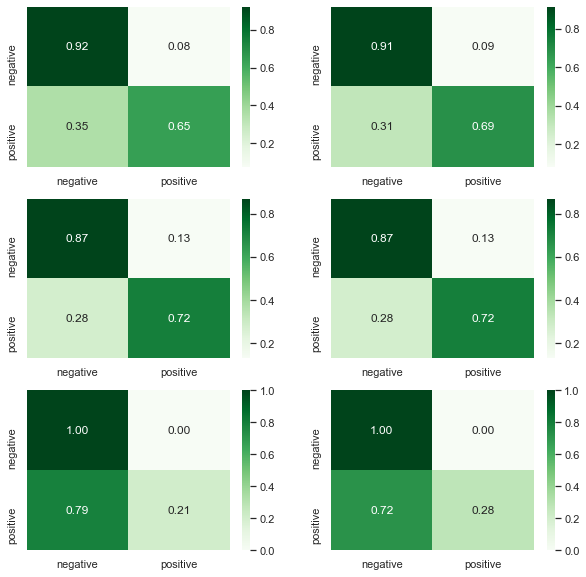

In [19]:
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=len(llst_all_model_accuracy),ncols=2,figsize=(10,10))

lint_global_idx = 0
for i, llst_all_train_test_accuracies in enumerate(llst_all_model_accuracy):
    for j, llst_all_train_test_accuracy in enumerate(llst_all_train_test_accuracies):
        cm = confusion_matrix(llst_all_train_test_accuracy[1], llst_all_train_test_accuracy[0], 
                              labels=list(set(my_tags)))
        df_cm = pd.DataFrame(cm, index = list(set(my_tags)),
                  columns = list(set(my_tags)))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        df_cm = pd.DataFrame(cmn, index=df_cm.index, columns=df_cm.columns)
        seabornInstance.heatmap(df_cm, annot=True, fmt='.2f', 
                                cmap = 'Greens', 
                                ax=axes.flat[lint_global_idx])
        lint_global_idx = lint_global_idx+1

##### 9. Train on K-folds

In [20]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7)

In [21]:
result_uni_lsvm = model_selection.cross_val_score(lsvm_uni_model, X_train, y_train, cv=kfold, scoring="accuracy")
result_uni_log_reg = model_selection.cross_val_score(log_reg_uni_model, X_train, y_train, cv=kfold, scoring="accuracy")
result_uni_naive_bayes = model_selection.cross_val_score(nb_uni_model, X_train, y_train, cv=kfold, scoring="accuracy")

In [22]:
print(result_uni_lsvm.mean(),result_uni_lsvm.std())
print(result_uni_log_reg.mean(),result_uni_log_reg.std())
print(result_uni_naive_bayes.mean(),result_uni_naive_bayes.std())

0.7846960167714886 0.042730455076947664
0.7734800838574424 0.05267625581712689
0.7170510132774284 0.05262820082344598


### Conclusion

#### Train Test Validation Split
<ol>
 <strong><li>SVM: 0.83</li></strong>
 <li>Logistic Regression: 0.82</li>
 <li>Naive Bayes: 0.75</li>
</ol>


#### Using 10-folds:
<ol>
 <strong><li>SVM: 0.78</li></strong>
 <li>Logistic Regression: 0.77</li>
 <li>Naive Bayes: 0.71</li>
</ol>

<h1><center>End Here</center></h1>